<a href="https://colab.research.google.com/github/lzgustavo13/Projeto-Estatistica/blob/main/Hypertension-Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Lendo Dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Análise dataset**

Gênero: Homem(1), Mulher(0)

Atual Fumante: Não(0), Sim(1)

Diabetes: Não(0), Sim(1)

Risk: Baixo risco(0), Alto risco(1)

### **Checagem de dados**

In [ ]:
# Observando o dataset, verificamos as pessoas que não tinham todas as informações
import pandas as pd
db = pd.read_csv(r"/content/dataset.csv")

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [ ]:
# Usando o método dropna, removemos os valores nulos do nosso dataset
db = db.dropna()
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3751 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           3751 non-null   int64  
 1   age            3751 non-null   int64  
 2   currentSmoker  3751 non-null   int64  
 3   cigsPerDay     3751 non-null   float64
 4   BPMeds         3751 non-null   float64
 5   diabetes       3751 non-null   int64  
 6   totChol        3751 non-null   float64
 7   sysBP          3751 non-null   float64
 8   diaBP          3751 non-null   float64
 9   BMI            3751 non-null   float64
 10  heartRate      3751 non-null   float64
 11  glucose        3751 non-null   float64
 12  Risk           3751 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 410.3 KB


### **Plotagem após remoção de valores nulos - balanceamento**

<Axes: xlabel='Risk', ylabel='count'>

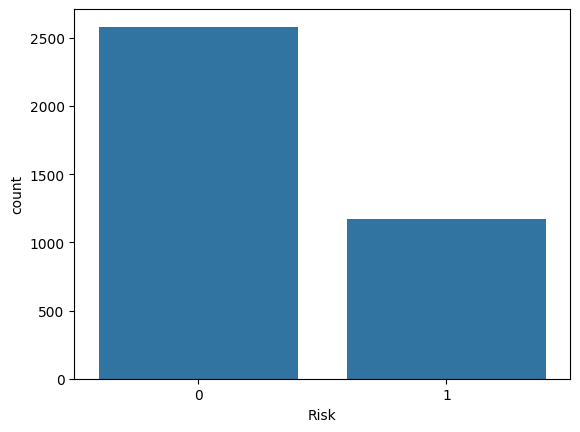

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = db["Risk"])

### **Feature Engineering - seleção de variáveis mais importantes**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Separação de Variáveis
y = db["Risk"]
X = db.drop("Risk", axis=1)

# Seleção das Melhores Features
best_features = SelectKBest(score_func=chi2, k=9)
fit = best_features.fit(X, y)

# Criação de DataFrames para Pontuações e Colunas
feature_scores = pd.DataFrame({
    'Variaveis': X.columns,
    'Pontuação': fit.scores_
})

# Exibição das 9 melhores features
print(feature_scores.nlargest(9, 'Pontuação'))

# Lista de variáveis importantes (baseada nas pontuações)
importantes = feature_scores.nlargest(9, 'Pontuação')['Variaveis'].tolist()

# Criação de um novo DataFrame com as variáveis importantes
db_new = db[importantes]


     Variaveis    Pontuação
7        sysBP  6705.781907
8        diaBP  2448.956361
6      totChol   853.904025
1          age   517.840159
3   cigsPerDay   269.477163
4       BPMeds   251.482051
9          BMI   221.098089
11     glucose   192.193923
10   heartRate   142.812093


### **Categorização**

Após realizar a seleção das features mais importantes, vamos plotar os gráficos que relacionam cada uma das variáveis ao risco (alvo), e logo depois de tal plotagem, iremos inicializar a categorização dos dados, visando uma utilização mais simples do classificador de Naive Bayes.

**1- Pressão sistólica**

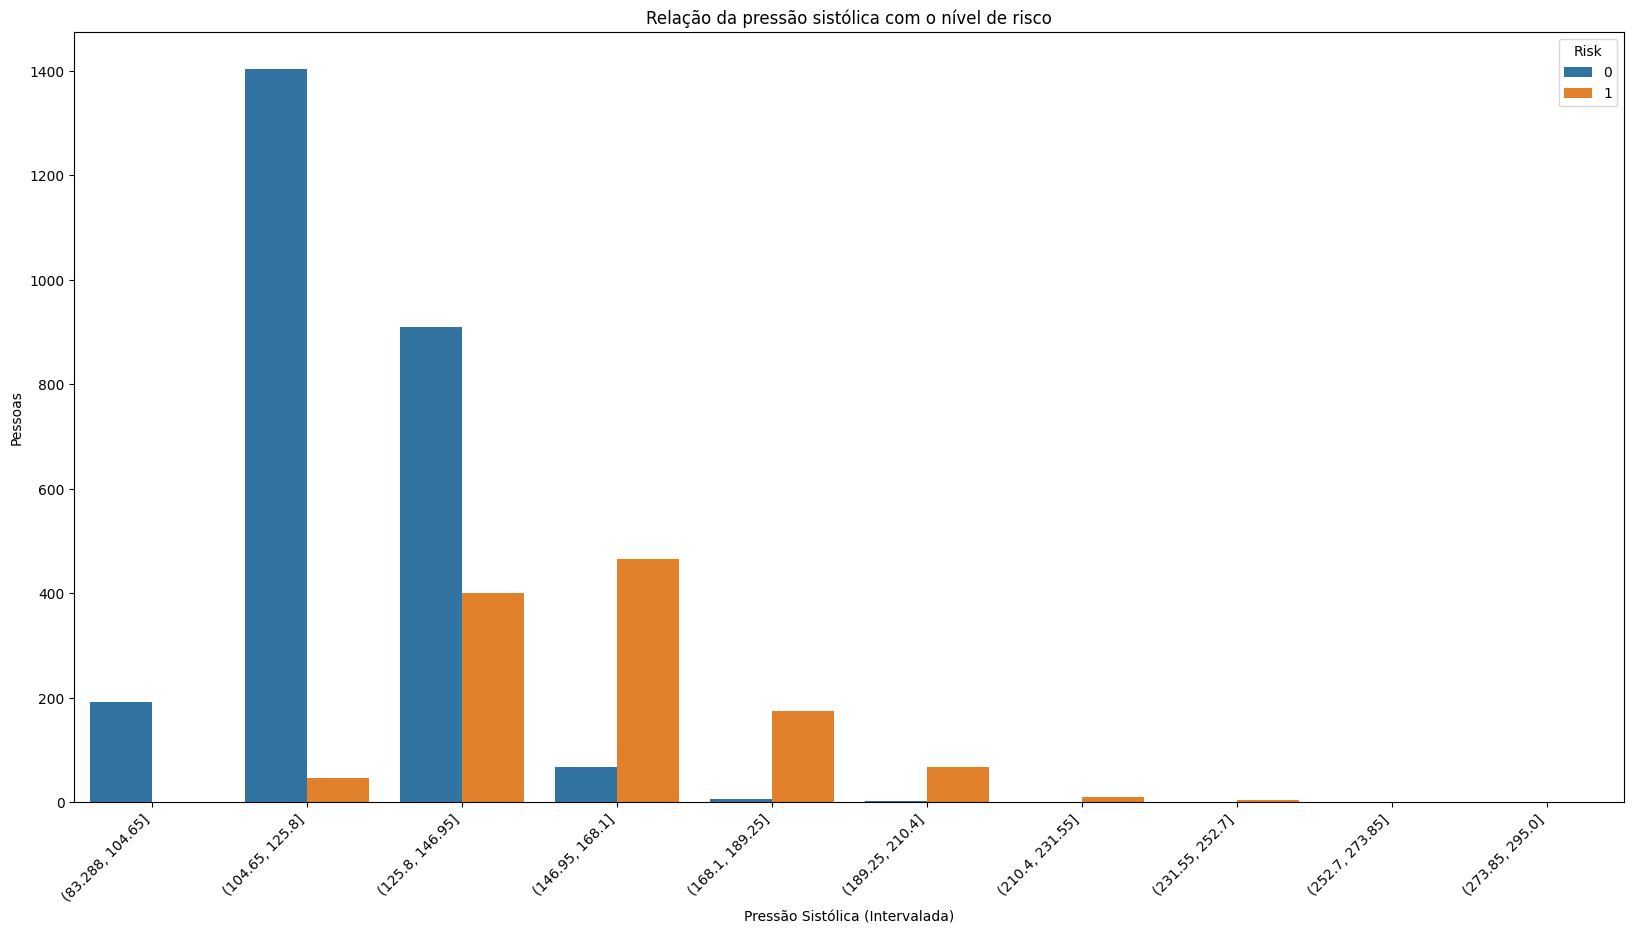

In [ ]:
db['sysBP_bin'] = pd.cut(db['sysBP'], bins=10)

plt.figure(figsize=(20,10))
sns.countplot(x='sysBP_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Pressão Sistólica (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação da pressão sistólica com o nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
  if row['sysBP'] >= 83.288 and row['sysBP'] < 104.65: # 1
    db_new.loc[index, 'sysBP'] = 1
  elif row['sysBP'] >= 104.65 and row['sysBP'] < 125.8: # 2
    db_new.loc[index, 'sysBP'] = 2
  elif row['sysBP'] >= 125.8 and row['sysBP'] < 146.95: # 3
    db_new.loc[index, 'sysBP'] = 3
  elif row['sysBP'] >= 146.95 and row['sysBP'] < 168.1: # 4
    db_new.loc[index, 'sysBP'] = 4
  elif row['sysBP'] >= 168.1 and row['sysBP'] < 189.25: # 5
    db_new.loc[index, 'sysBP'] = 5
  elif row['sysBP'] >= 189.25 and row['sysBP'] < 210.4: # 6
    db_new.loc[index, 'sysBP'] = 6
  elif row['sysBP'] >= 210.4 and row['sysBP'] < 231.55: # 7
    db_new.loc[index, 'sysBP'] = 7
  elif row['sysBP'] >= 231.55 and row['sysBP'] < 252.7: # 8
    db_new.loc[index, 'sysBP'] = 8
  elif row['sysBP'] >= 252.7 and row['sysBP'] < 273.85: # 9
    db_new.loc[index, 'sysBP'] = 9
  elif row['sysBP'] >= 273.85 and row['sysBP'] < 295: # 10
    db_new.loc[index, 'sysBP'] = 10

**2- Pressão diastólica**

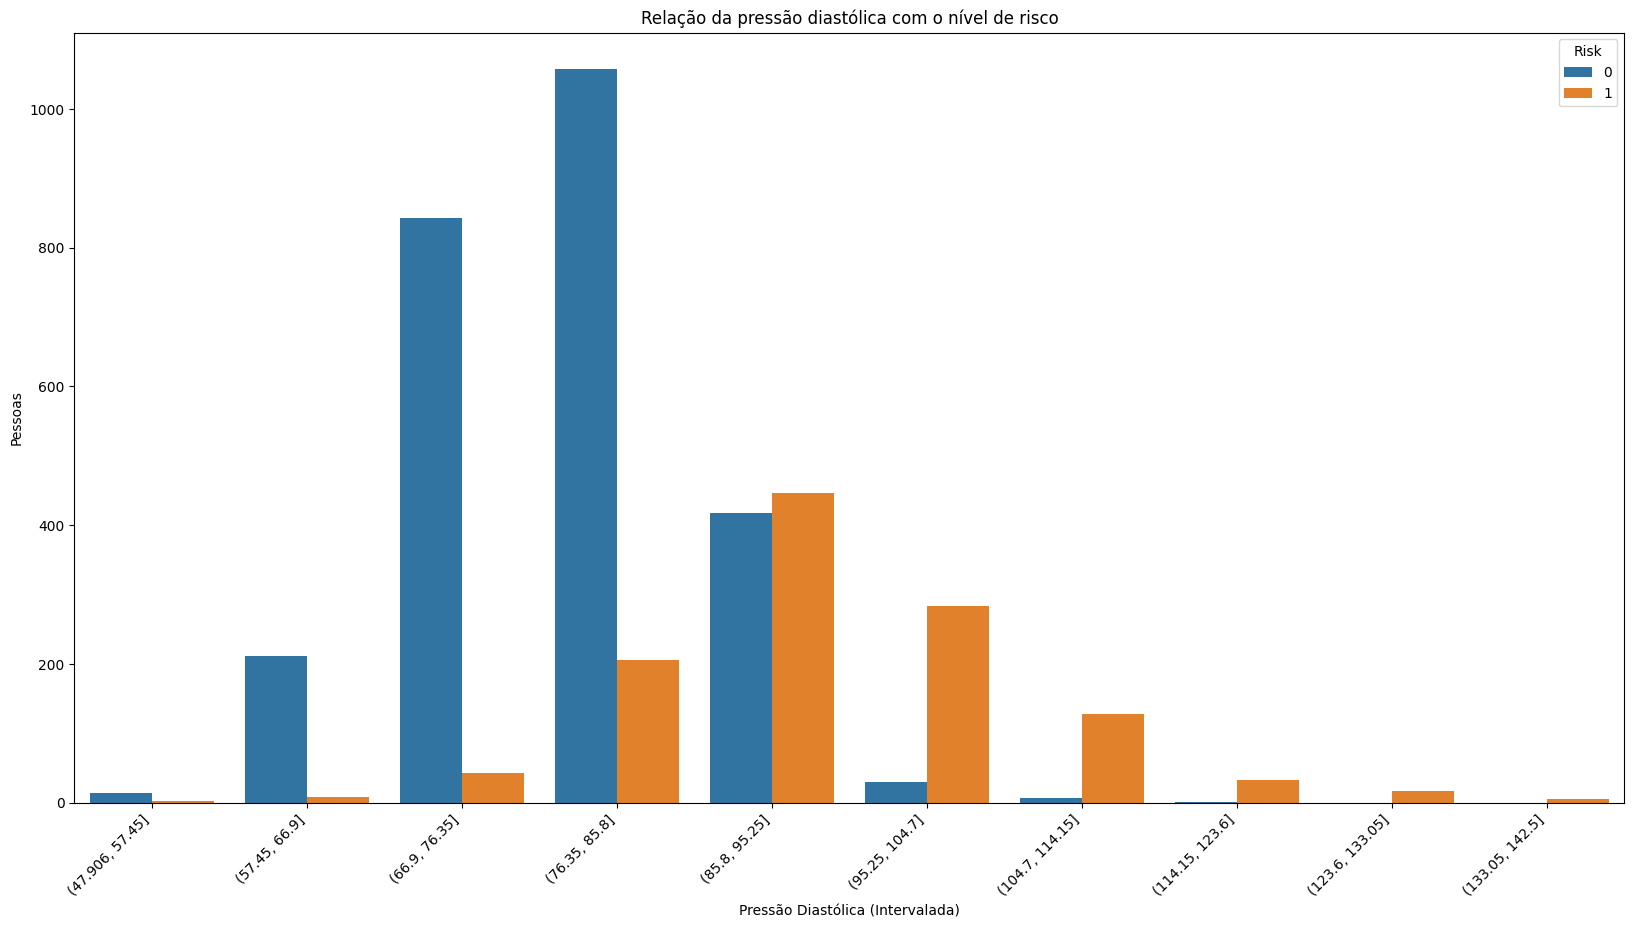

In [ ]:
db['diaBP_bin'] = pd.cut(db['diaBP'], bins=10)

plt.figure(figsize=(20,10))
sns.countplot(x='diaBP_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Pressão Diastólica (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação da pressão diastólica com o nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
  if row['diaBP'] >= 47.906 and row['diaBP'] < 57.45: # 1
    db_new.loc[index, 'diaBP'] = 1
  elif row['diaBP'] >= 57.45 and row['diaBP'] < 66.9: # 2
    db_new.loc[index, 'diaBP'] = 2
  elif row['diaBP'] >= 66.9 and row['diaBP'] < 76.35: # 3
    db_new.loc[index, 'diaBP'] = 3
  elif row['diaBP'] >= 76.35 and row['diaBP'] < 85.8: # 4
    db_new.loc[index, 'diaBP'] = 4
  elif row['diaBP'] >= 85.8 and row['diaBP'] < 95.25: # 5
    db_new.loc[index, 'diaBP'] = 5
  elif row['diaBP'] >= 95.25 and row['diaBP'] < 104.7: # 6
    db_new.loc[index, 'diaBP'] = 6
  elif row['diaBP'] >= 104.7 and row['diaBP'] < 114.15: # 7
    db_new.loc[index, 'diaBP'] = 7
  elif row['diaBP'] >= 114.15 and row['diaBP'] < 123.6: # 8
    db_new.loc[index, 'diaBP'] = 8
  elif row['diaBP'] >= 123.6 and row['diaBP'] < 133.05: # 9
    db_new.loc[index, 'diaBP'] = 9
  elif row['diaBP'] >= 133.05 and row['diaBP'] <= 142.5: # 10
    db_new.loc[index, 'diaBP'] = 10

**3- Colesterol**

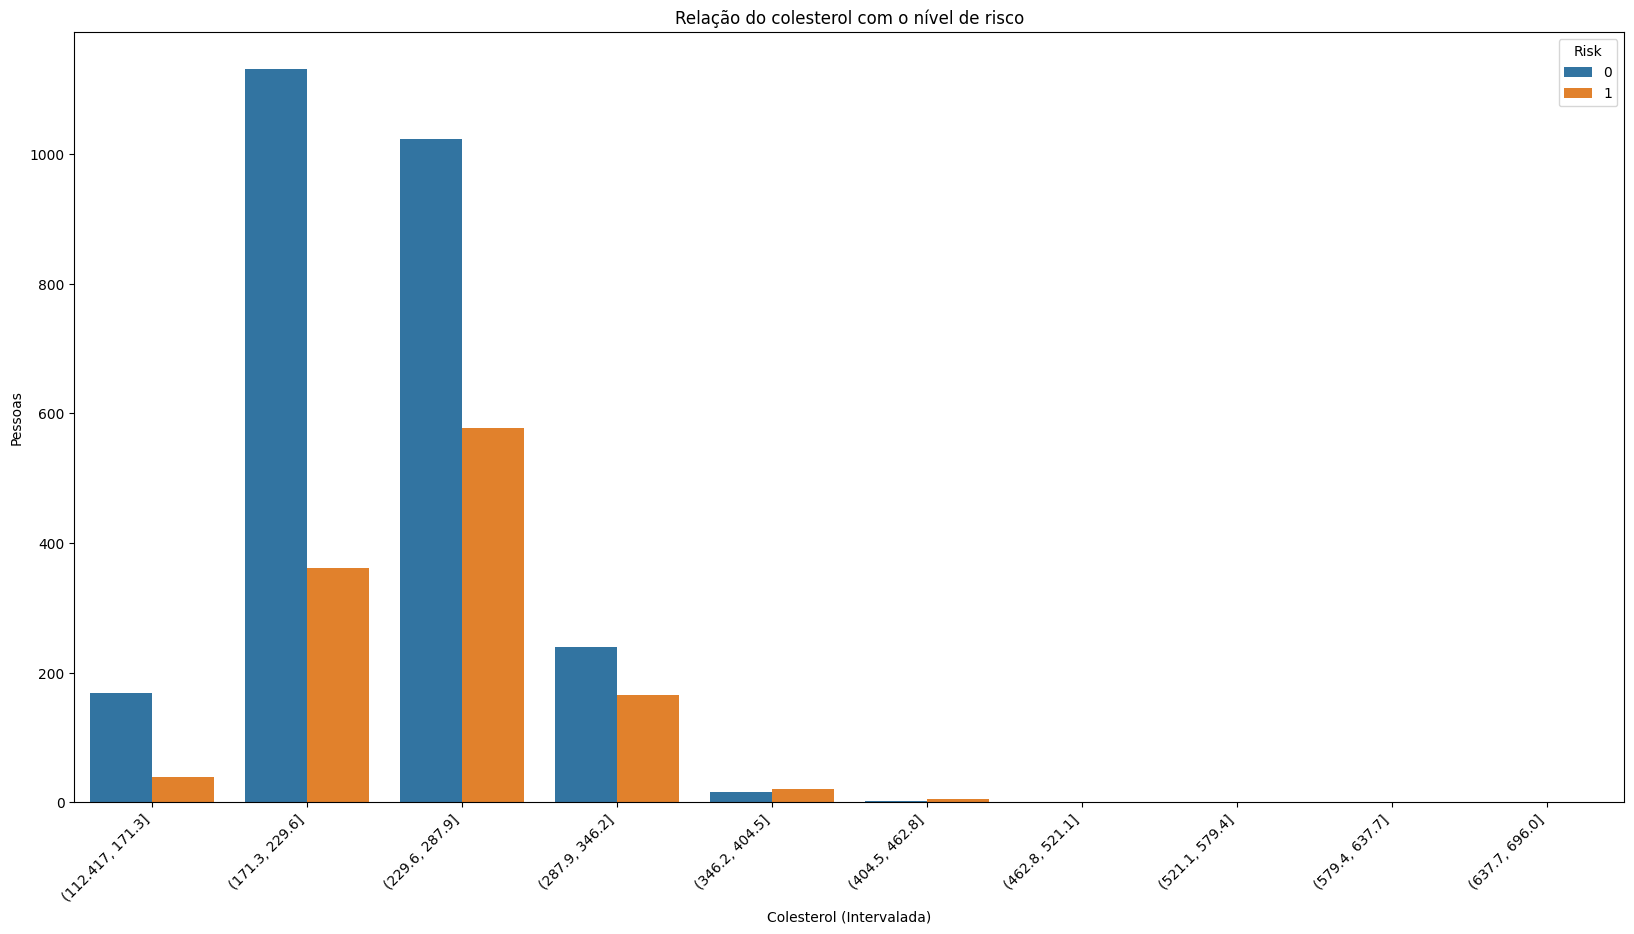

In [ ]:
db['totChol_bin'] = pd.cut(db['totChol'], bins=10)

plt.figure(figsize=(20,10))
sns.countplot(x='totChol_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Colesterol (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação do colesterol com o nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
  if row['totChol'] >= 112.417 and row['totChol'] < 171.3: # 1
    db_new.loc[index, 'totChol'] = 1
  elif row['totChol'] >= 171.3 and row['totChol'] < 229.6: # 2
    db_new.loc[index, 'totChol'] = 2
  elif row['totChol'] >= 229.6 and row['totChol'] < 287.9: # 3
    db_new.loc[index, 'totChol'] = 3
  elif row['totChol'] >= 287.9 and row['totChol'] < 346.2: # 4
    db_new.loc[index, 'totChol'] = 4
  elif row['totChol'] >= 346.2 and row['totChol'] < 404.5: # 5
    db_new.loc[index, 'totChol'] = 5
  elif row['totChol'] >= 404.5 and row['totChol'] < 462.8: # 6
    db_new.loc[index, 'totChol'] = 6
  elif row['totChol'] >= 462.8 and row['totChol'] < 521.1: # 7
    db_new.loc[index, 'totChol'] = 7
  elif row['totChol'] >= 521.1 and row['totChol'] < 579.4: # 8
    db_new.loc[index, 'totChol'] = 8
  elif row['totChol'] >= 579.4 and row['totChol'] < 637.7: # 9
    db_new.loc[index, 'totChol'] = 9
  elif row['totChol'] >= 637.7 and row['totChol'] <= 696: # 10
    db_new.loc[index, 'totChol'] = 10

**4- Idade**

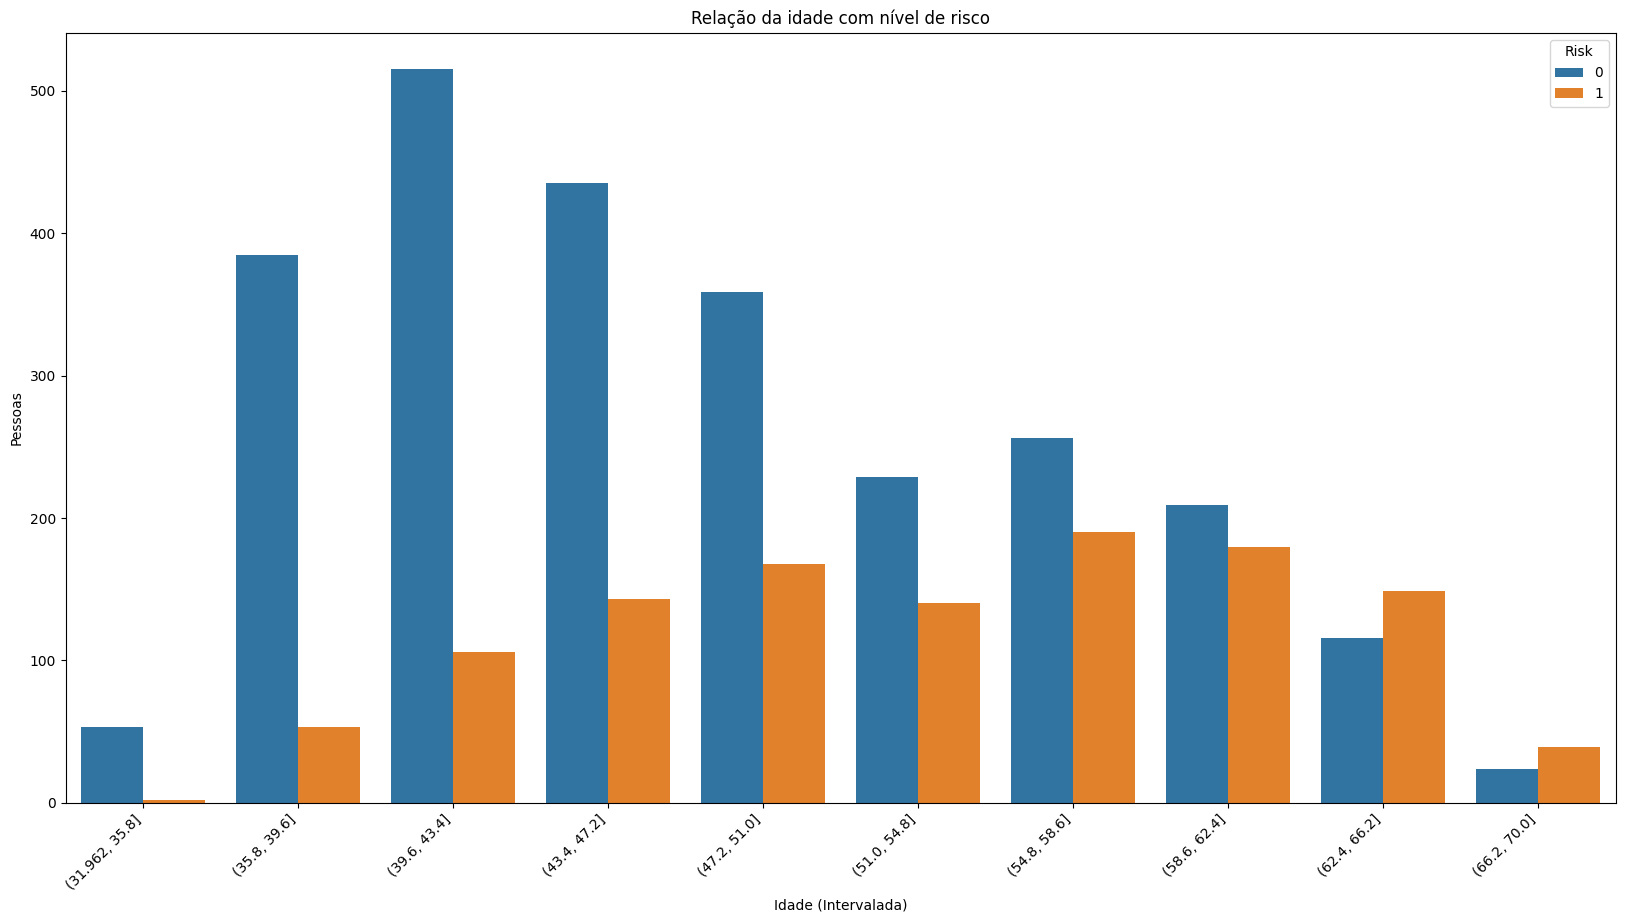

In [ ]:
db['age_bin'] = pd.cut(db['age'], bins=10)

plt.figure(figsize=(20,10))
sns.countplot(x='age_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Idade (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação da idade com nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
  if row['age'] >= 31.962 and row['age'] < 35.8: # 1
    db_new.loc[index, 'age'] = 1
  elif row['age'] >= 35.8 and row['age'] < 39.6: # 2
    db_new.loc[index, 'age'] = 2
  elif row['age'] >= 39.6 and row['age'] < 43.4: # 3
    db_new.loc[index, 'age'] = 3
  elif row['age'] >= 43.4 and row['age'] < 47.2: # 4
    db_new.loc[index, 'age'] = 4
  elif row['age'] >= 47.2 and row['age'] < 51: # 5
    db_new.loc[index, 'age'] = 5
  elif row['age'] >= 51 and row['age'] < 54.8: # 6
    db_new.loc[index, 'age'] = 6
  elif row['age'] >= 54.8 and row['age'] < 58.6: # 7
    db_new.loc[index, 'age'] = 7
  elif row['age'] >= 58.6 and row['age'] < 62.4: # 8
    db_new.loc[index, 'age'] = 8
  elif row['age'] >= 62.4 and row['age'] < 66.2: # 9
    db_new.loc[index, 'age'] = 9
  elif row['age'] >= 66.2 and row['age'] <= 70: # 10
    db_new.loc[index, 'age'] = 10

**5 - Qtd de cigarros por dia**

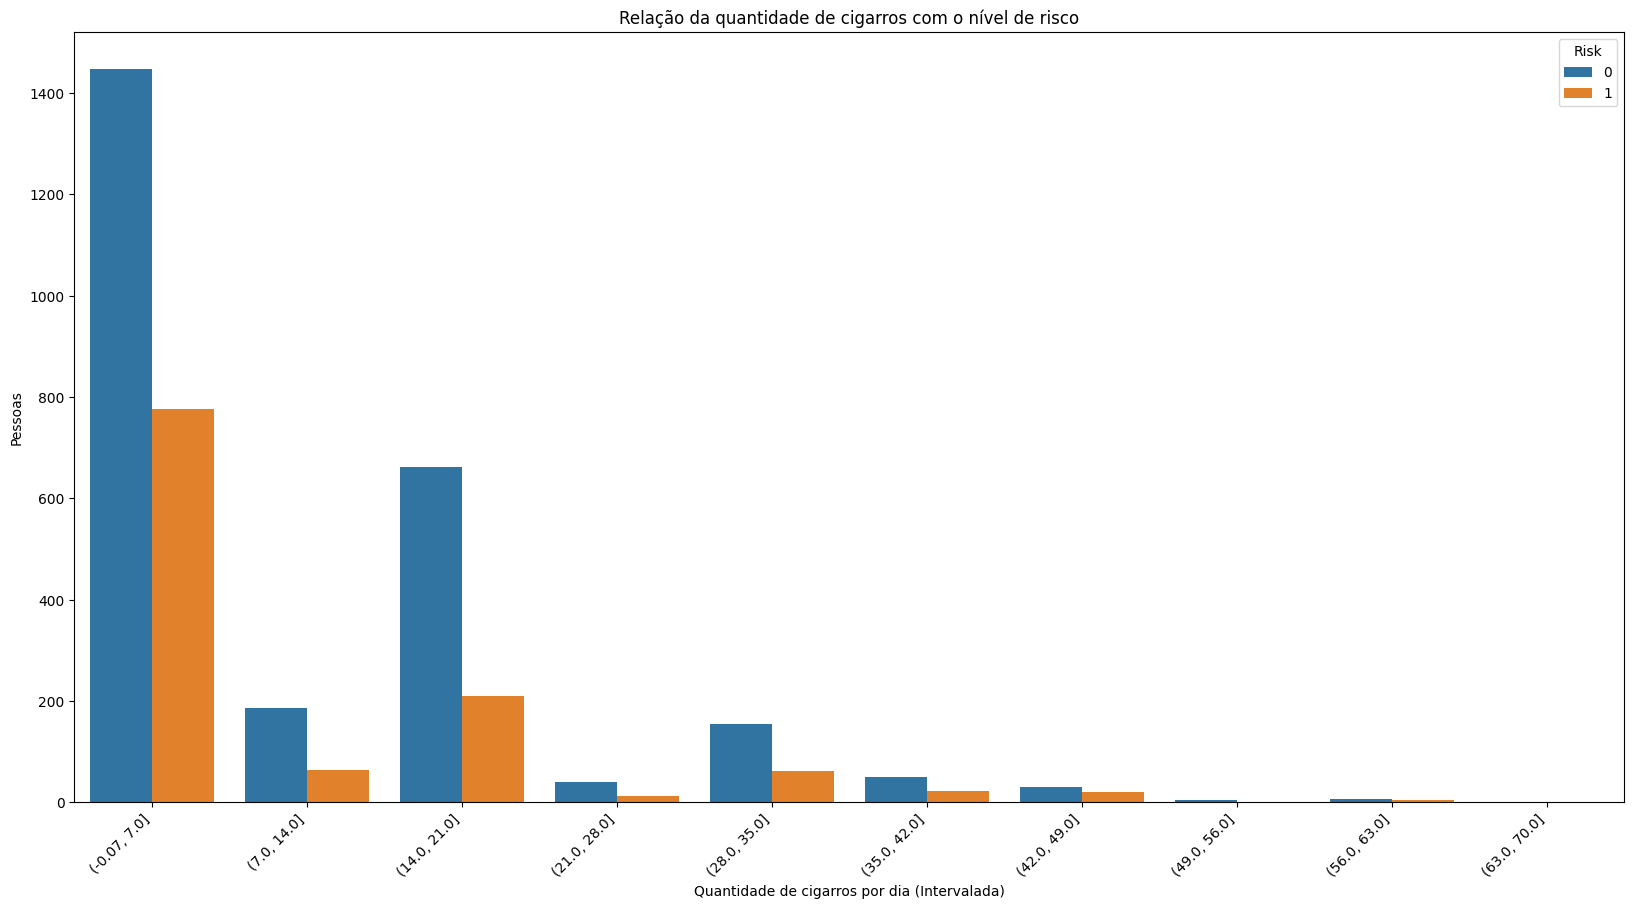

In [ ]:
db['cigsPerDay_bin'] = pd.cut(db['cigsPerDay'], bins=10)

plt.figure(figsize=(20,10))
sns.countplot(x='cigsPerDay_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Quantidade de cigarros por dia (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação da quantidade de cigarros com o nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
    if row['cigsPerDay'] >= 0.07 and row['cigsPerDay'] < 7:  # 1
        db_new.loc[index, 'cigsPerDay'] = 1
    elif row['cigsPerDay'] >= 7 and row['cigsPerDay'] < 14:  # 2
        db_new.loc[index, 'cigsPerDay'] = 2
    elif row['cigsPerDay'] >= 14 and row['cigsPerDay'] < 21:  # 3
        db_new.loc[index, 'cigsPerDay'] = 3
    elif row['cigsPerDay'] >= 21 and row['cigsPerDay'] < 28:  # 4
        db_new.loc[index, 'cigsPerDay'] = 4
    elif row['cigsPerDay'] >= 28 and row['cigsPerDay'] < 35:  # 5
        db_new.loc[index, 'cigsPerDay'] = 5
    elif row['cigsPerDay'] >= 35 and row['cigsPerDay'] < 42:  # 6
        db_new.loc[index, 'cigsPerDay'] = 6
    elif row['cigsPerDay'] >= 42 and row['cigsPerDay'] < 49:  # 7
        db_new.loc[index, 'cigsPerDay'] = 7
    elif row['cigsPerDay'] >= 49 and row['cigsPerDay'] < 56:  # 8
        db_new.loc[index, 'cigsPerDay'] = 8
    elif row['cigsPerDay'] >= 56 and row['cigsPerDay'] < 63:  # 9
        db_new.loc[index, 'cigsPerDay'] = 9
    elif row['cigsPerDay'] >= 63 and row['cigsPerDay'] <= 70:  # 10
        db_new.loc[index, 'cigsPerDay'] = 10

**6- Pressão Sanguínea**  

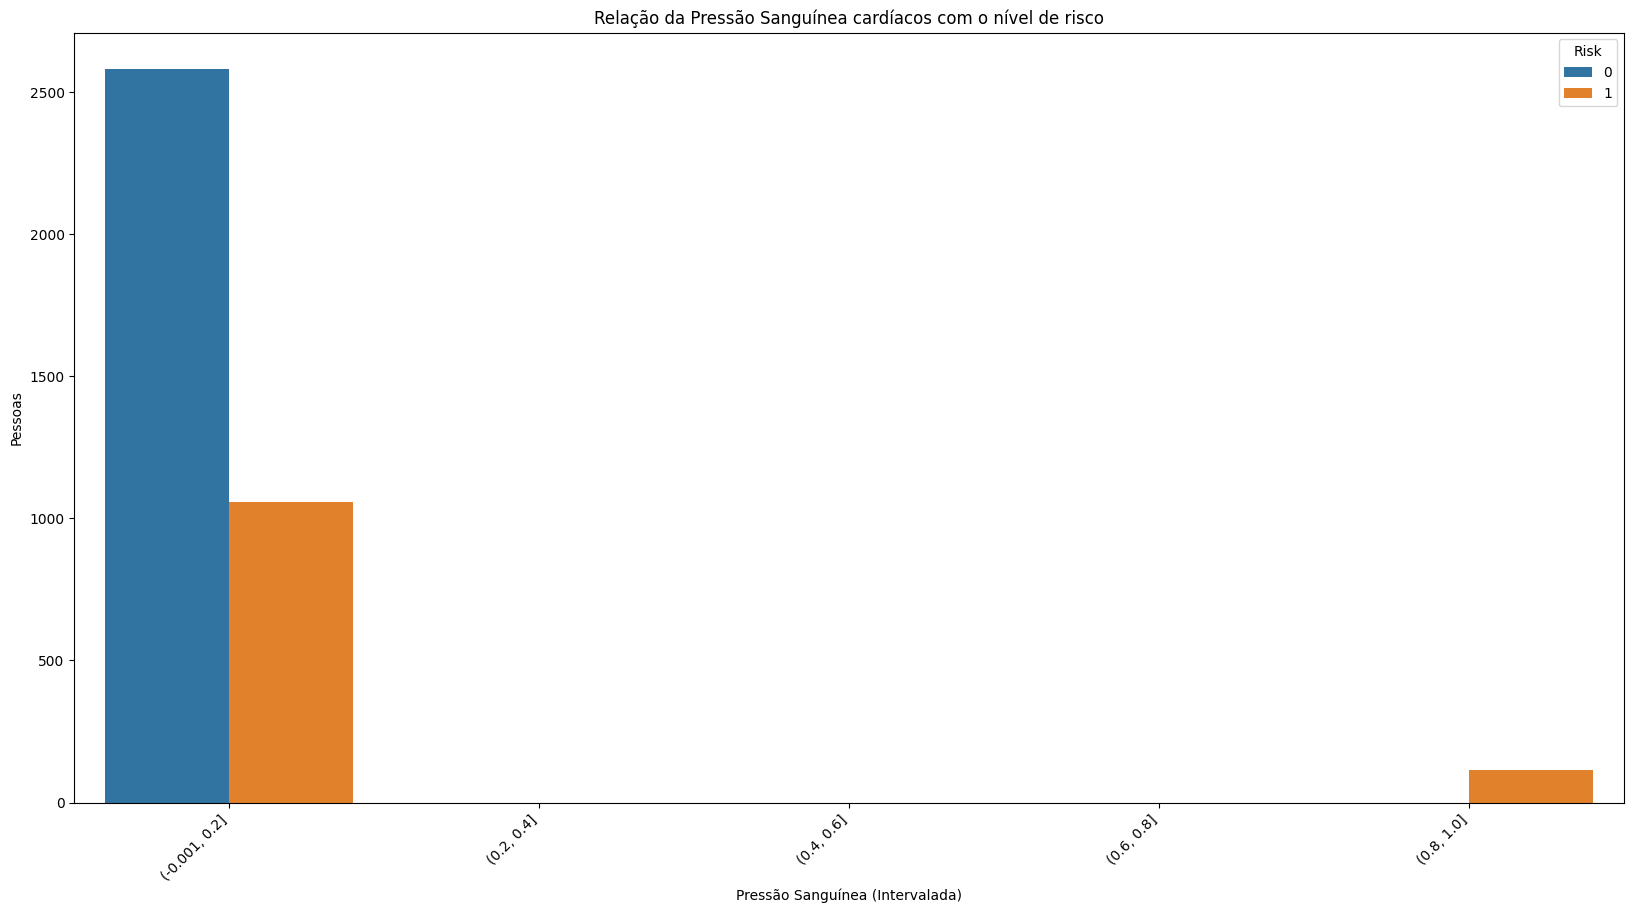

In [ ]:
db['BPMeds_bin'] = pd.cut(db['BPMeds'], bins=5)

plt.figure(figsize=(20,10))
sns.countplot(x='BPMeds_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Pressão Sanguínea (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação da Pressão Sanguínea cardíacos com o nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
    if row['BPMeds'] >= 0.0001 and row['BPMeds'] < 0.2:  # 1
        db_new.loc[index, 'BPMeds'] = 1
    elif row['BPMeds'] >= 0.2 and row['BPMeds'] < 0.4:  # 2
        db_new.loc[index, 'BPMeds'] = 2
    elif row['BPMeds'] >= 0.4 and row['BPMeds'] < 0.6:  # 3
        db_new.loc[index, 'BPMeds'] = 3
    elif row['BPMeds'] >= 0.6 and row['BPMeds'] < 0.8:  # 4
        db_new.loc[index, 'BPMeds'] = 4
    elif row['BPMeds'] >= 0.8 and row['BPMeds'] <= 1:  # 5
        db_new.loc[index, 'BPMeds'] = 5

**7- IMC**

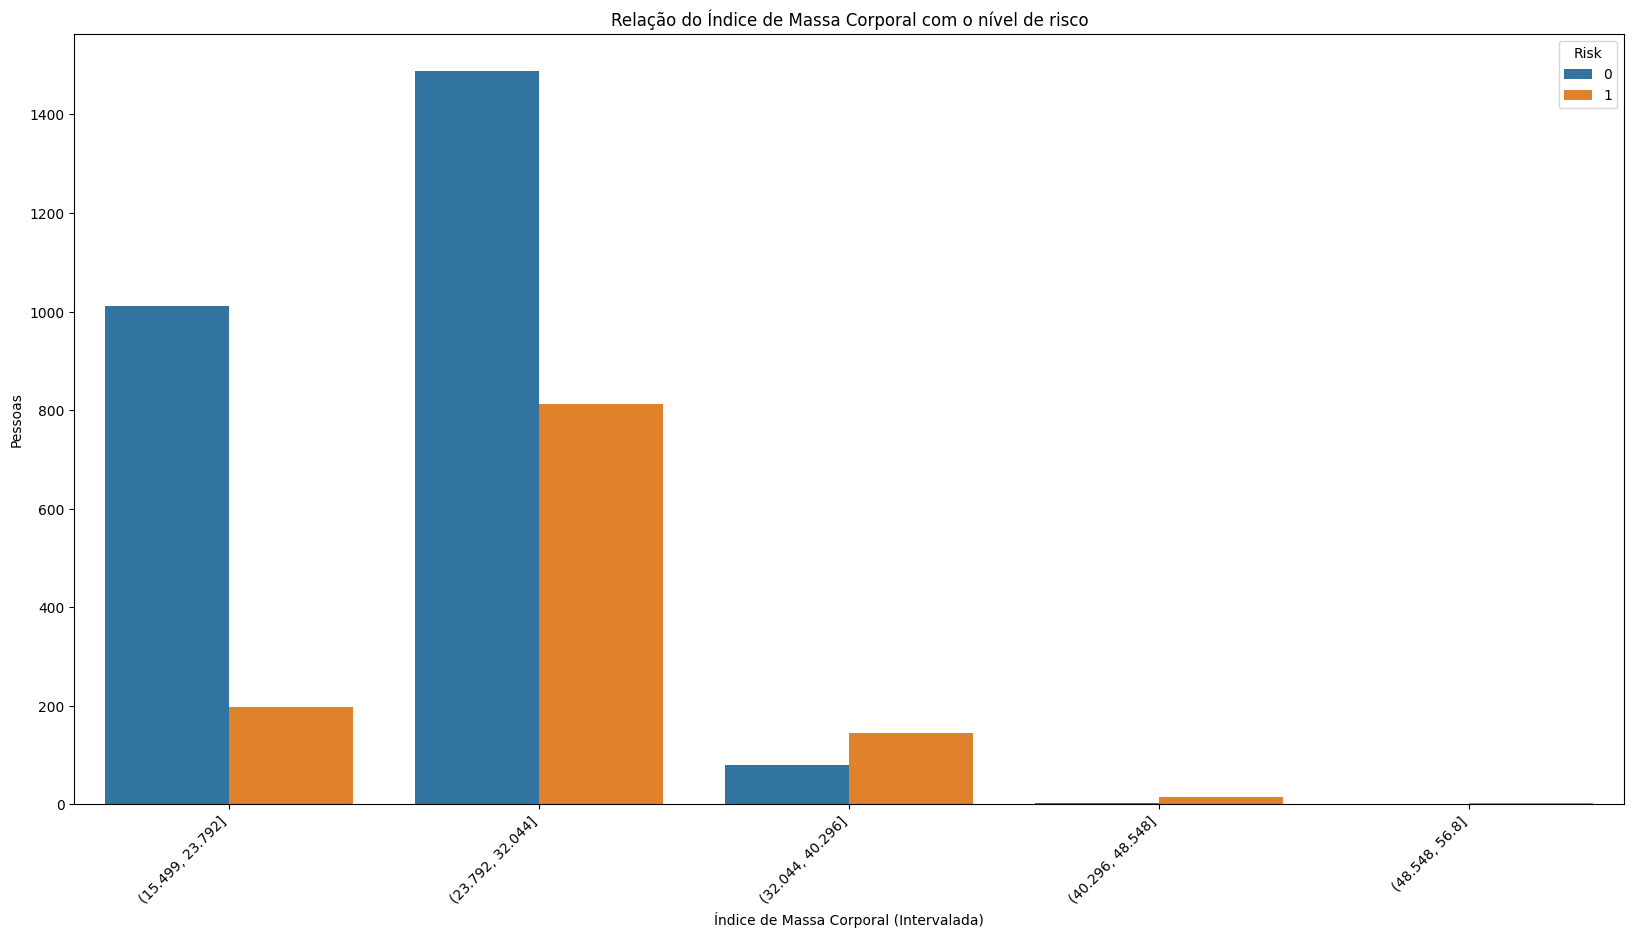

In [ ]:
db['BMI_bin'] = pd.cut(db['BMI'], bins=5)

plt.figure(figsize=(20,10))
sns.countplot(x='BMI_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Índice de Massa Corporal (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação do Índice de Massa Corporal com o nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
    if row['BMI'] >= 15.499 and row['BMI'] < 23.792:  # 1
        db_new.loc[index, 'BMI'] = 1
    elif row['BMI'] >= 23.792 and row['BMI'] < 32.044:  # 2
        db_new.loc[index, 'BMI'] = 2
    elif row['BMI'] >= 32.044 and row['BMI'] < 40.296:  # 3
        db_new.loc[index, 'BMI'] = 3
    elif row['BMI'] >= 40.296 and row['BMI'] < 48.548:  # 4
        db_new.loc[index, 'BMI'] = 4
    elif row['BMI'] >= 48.548 and row['BMI'] <= 56.8:  # 5
        db_new.loc[index, 'BMI'] = 5

**8- Nível de glicose**

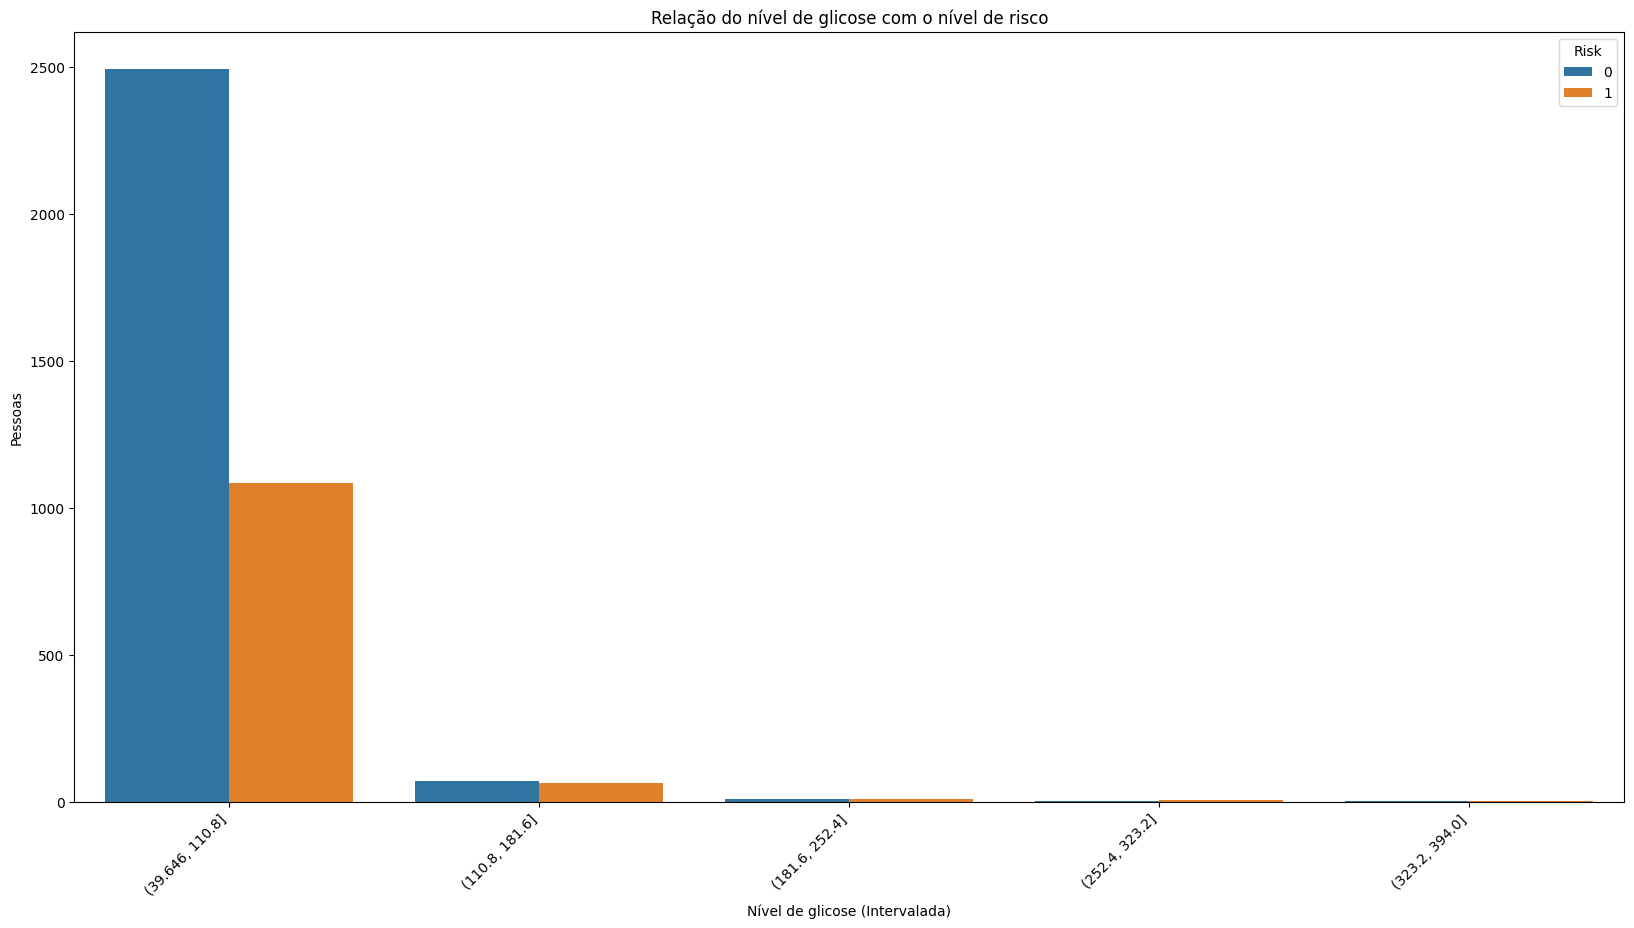

In [ ]:
db['glucose_bin'] = pd.cut(db['glucose'], bins=5)

plt.figure(figsize=(20,10))
sns.countplot(x='glucose_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nível de glicose (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação do nível de glicose com o nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
    if row['glucose'] >= 39.646 and row['glucose'] < 110.8:  # 1
        db_new.loc[index, 'glucose'] = 1
    elif row['glucose'] >= 110.8 and row['glucose'] < 181.6:  # 2
        db_new.loc[index, 'glucose'] = 2
    elif row['glucose'] >= 181.6 and row['glucose'] < 252.4:  # 3
        db_new.loc[index, 'glucose'] = 3
    elif row['glucose'] >= 252.4 and row['glucose'] < 323.2:  # 4
        db_new.loc[index, 'glucose'] = 4
    elif row['glucose'] >= 323.2 and row['glucose'] <= 394:  # 5
        db_new.loc[index, 'glucose'] = 5

**9- Batimento cardíaco**

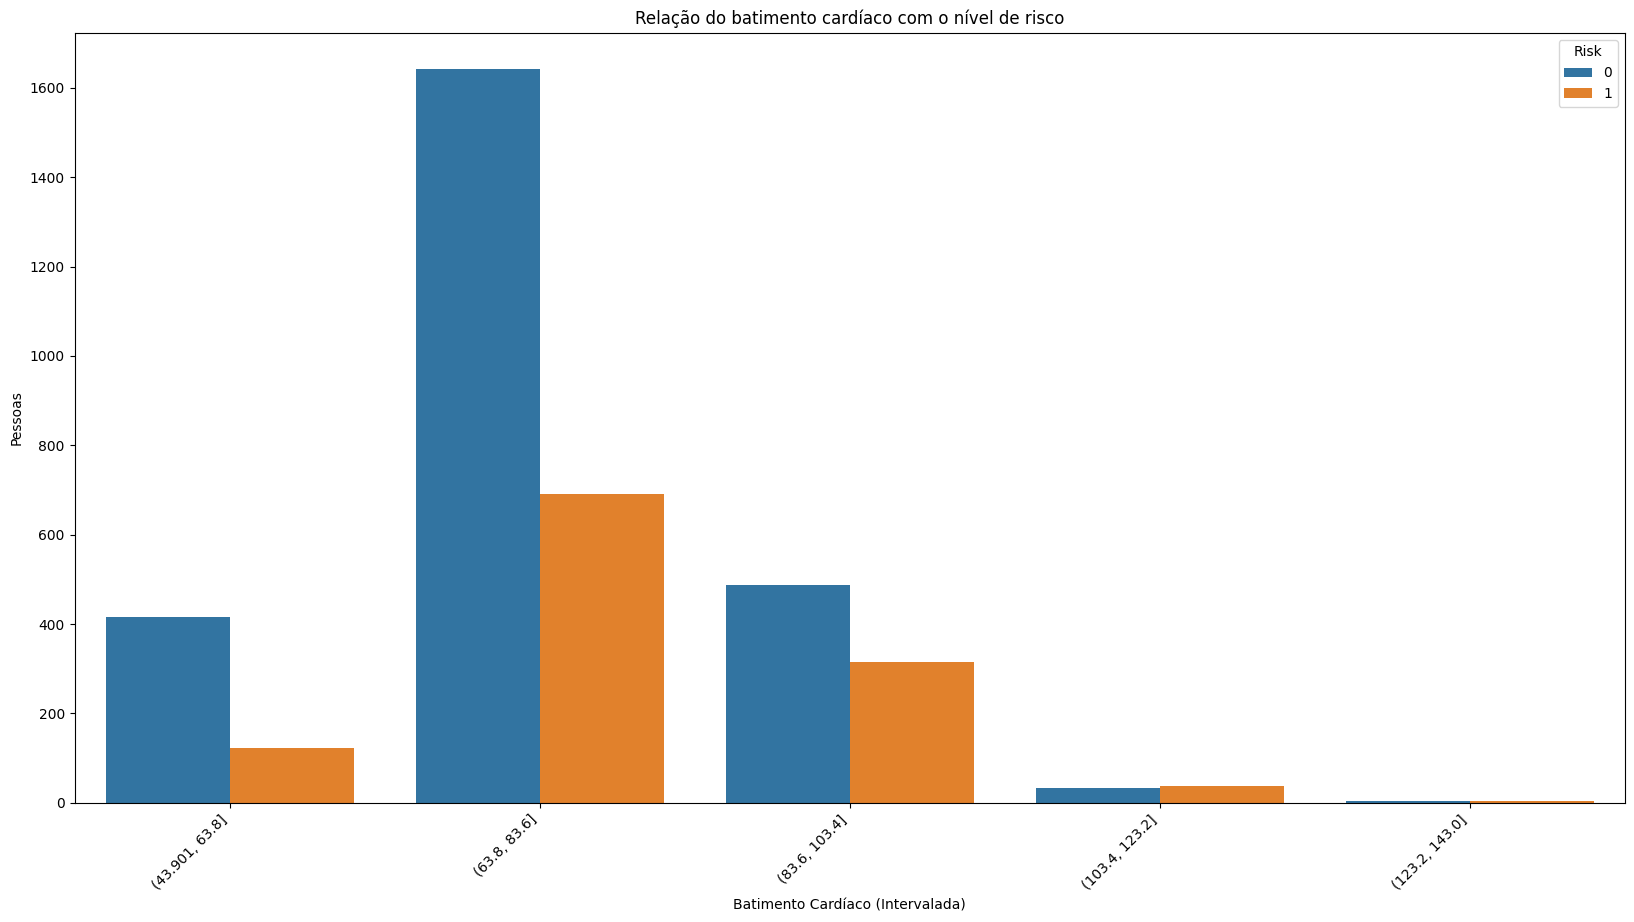

In [ ]:
db['heartRate_bin'] = pd.cut(db['heartRate'], bins=5)

plt.figure(figsize=(20,10))
sns.countplot(x='heartRate_bin', data=db, hue='Risk')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Batimento Cardíaco (Intervalada)')
plt.ylabel('Pessoas')
plt.title('Relação do batimento cardíaco com o nível de risco')
plt.legend(title='Risk')
plt.show()

In [ ]:
for index, row in db_new.iterrows():
    if row['heartRate'] >= 43.901 and row['heartRate'] < 63.8: # 1
        db_new.loc[index, 'heartRate'] = 1
    elif row['heartRate'] >= 63.8 and row['heartRate'] < 83.6: # 2
        db_new.loc[index, 'heartRate'] = 2
    elif row['heartRate'] >= 83.6 and row['heartRate'] < 103.4: # 3
        db_new.loc[index, 'heartRate'] = 3
    elif row['heartRate'] >= 103.4 and row['heartRate'] < 123.2: # 4
        db_new.loc[index, 'heartRate'] = 4
    elif row['heartRate'] >= 123.3 and row['heartRate'] <= 143: # 5
        db_new.loc[index, 'heartRate'] = 5

### **Classificador de Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=82)

res = CategoricalNB()
res.fit(X_train, y_train)

y_pred = res.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Result:\n{classification_rep}")

Accuracy: 0.88898756660746
Result:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       780
           1       0.84      0.79      0.81       346

    accuracy                           0.89      1126
   macro avg       0.87      0.86      0.87      1126
weighted avg       0.89      0.89      0.89      1126



### **Matriz de confunsão**

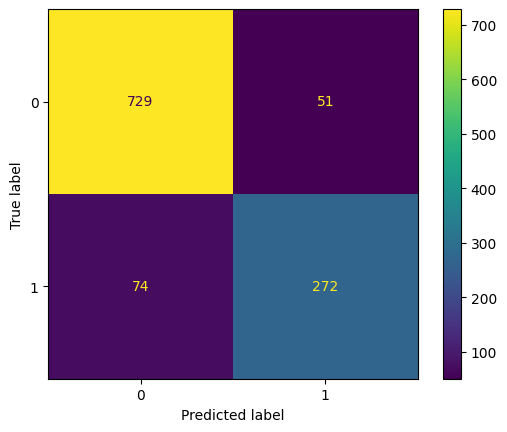

In [ ]:
labels = [0, 1]
conf = confusion_matrix(y_test, y_pred, labels=labels)
mat = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=labels)
mat.plot()